https://math.stackexchange.com/questions/151944/probability-distribution-of-a-coordinate-of-the-random-point-on-a-hypersphere-wi

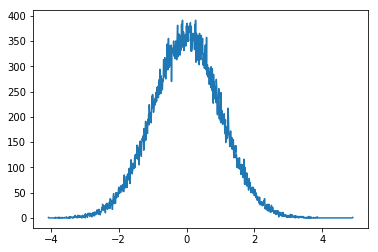

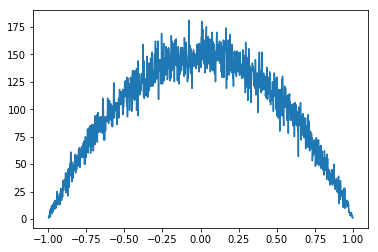

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from plot_helper import plot_histogram

def vec_dist(N):
    """
    Makes a normalized N-vector where each of its entries are ~normal(0, 1)
    Returns an array of shape (N,)
    """
    vec = np.random.normal(0, 1, N)
    v_norm = vec / np.linalg.norm(vec)
    return (vec[0], v_norm[0])

dim = 5
N = 100000

l = []
    
for i in range(N):
    l.append(vec_dist(dim))
    
v = list(zip(*l))[0]
v_norm = list(zip(*l))[1]

plot_histogram(v, N//100)
plot_histogram(v_norm, N//100)

In [29]:
from linalg_helper import *

dim = 10

v = make_random_direction(dim)

A = make_random_diagonal_matrix(dim, 2, 0.2, 1)
Q = make_random_subspace(dim, dim)
A_bar = Q @ A @ Q.T

def projs(v_dir, A, power, trials):
    ps = []
    powA = A
    for _ in range(power - 1):
        powA = powA @ A
    for _ in range(trials):
        v = make_random_direction(dim)
        ps.append(v_dir.dot(powA @ v))
    return ps

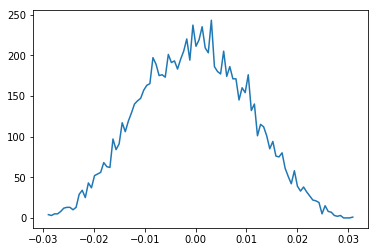

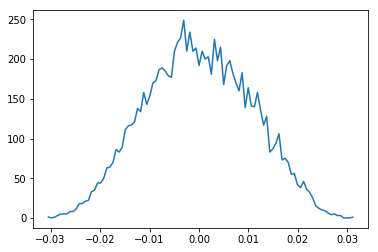

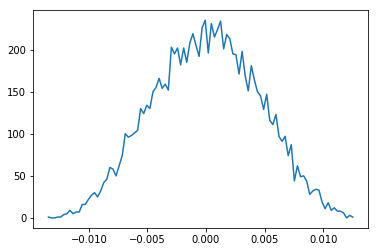

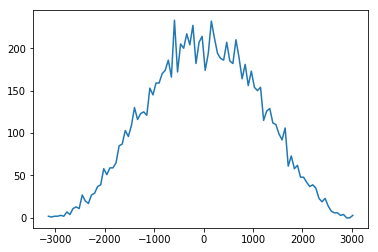

In [30]:
plot_histogram(projs(v, A_bar, 0, 10000), 100)
plot_histogram(projs(v, A_bar, 1, 10000), 100)
plot_histogram(projs(v, A_bar, 2, 10000), 100)
plot_histogram(projs(v, A_bar, 20, 10000), 100)